## Import Libraries + Load Data

In [74]:
import numpy as np
import pandas as pd

df = pd.read_csv('problem1.csv')

## Exploratory Metrics Analysis

In [75]:
# Observing general metrics and spread
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [76]:
# Observing median
print('median: ', np.median(df['order_amount']))

median:  284.0


## Exploratory Plots

<AxesSubplot:>

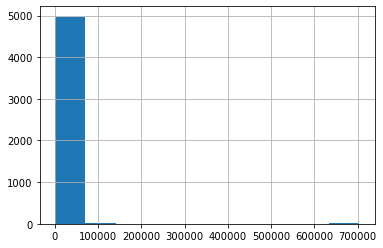

In [77]:
# Histogram plot
df['order_amount'].hist()

<AxesSubplot:>

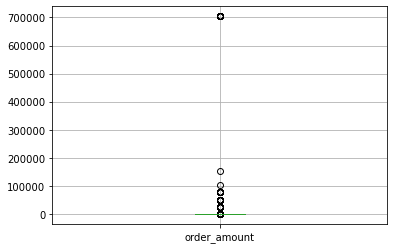

In [78]:
# Boxplot
df.boxplot(column='order_amount')

<font color='red'>Observation:</font> Exploratory analysis suggests extreme outliers to be skewing the order amount data, evident by an unusual max order amount (704000), and a large standard deviation (41282) relative to the mean (3145), leading to a coefficient of variation value >> 1. The relatively normal median (284) further suggests outliers to be impacting the mean and standard deviation, since median primarily depends on the order of the data.

A better way to evaluate the AOV would be to omit the outliers by filtering the dataset to include only IQR values, and then calculating the AOV.

## Filter Dataset to Include IQR Values Only

In [87]:
# Filter dataset to include only middle 50% range
pre_iqr = np.array(df['order_amount'])
q3, q1 = np.percentile(pre_iqr, [75 ,25])
iqr_df = df[(df['order_amount'] > q1) & (df['order_amount'] < q3)]

## Metrics from Filtered Dataset

In [91]:
# Reobserving metrics and spread
iqr_df['order_amount'].describe()

count    2451.000000
mean      275.412893
std        65.732992
min       164.000000
25%       224.000000
50%       284.000000
75%       328.000000
max       387.000000
Name: order_amount, dtype: float64

In [89]:
# Confirming median
print('median: ', np.median(iqr_df['order_amount']))

median:  284.0


<font color='red'>Conclusion:</font> The results above confirm that the data was skewed by outliers since the metrics and spread from the IQR filtered dataset shows much more acceptable values for standard deviation (65.7), mean (275), and a coefficient of variation value < 1.